
# <span style="color:rgb(213,80,0)">Exercise 7.2</span>

Augmented Investment Funds data. This file creates Figure A.36-A.43 and Table A.17

## Initial part

In [1]:
load InvFundsExt.mat
y=InvFundsExt{:,end};
X=InvFundsExt{:,[1 2]};
[n,p]=size(X);

prin=0;
nameXy=InvFundsExt.Properties.VariableNames;

## Create Figure A.36 (left panel)

fanplot just one lambda



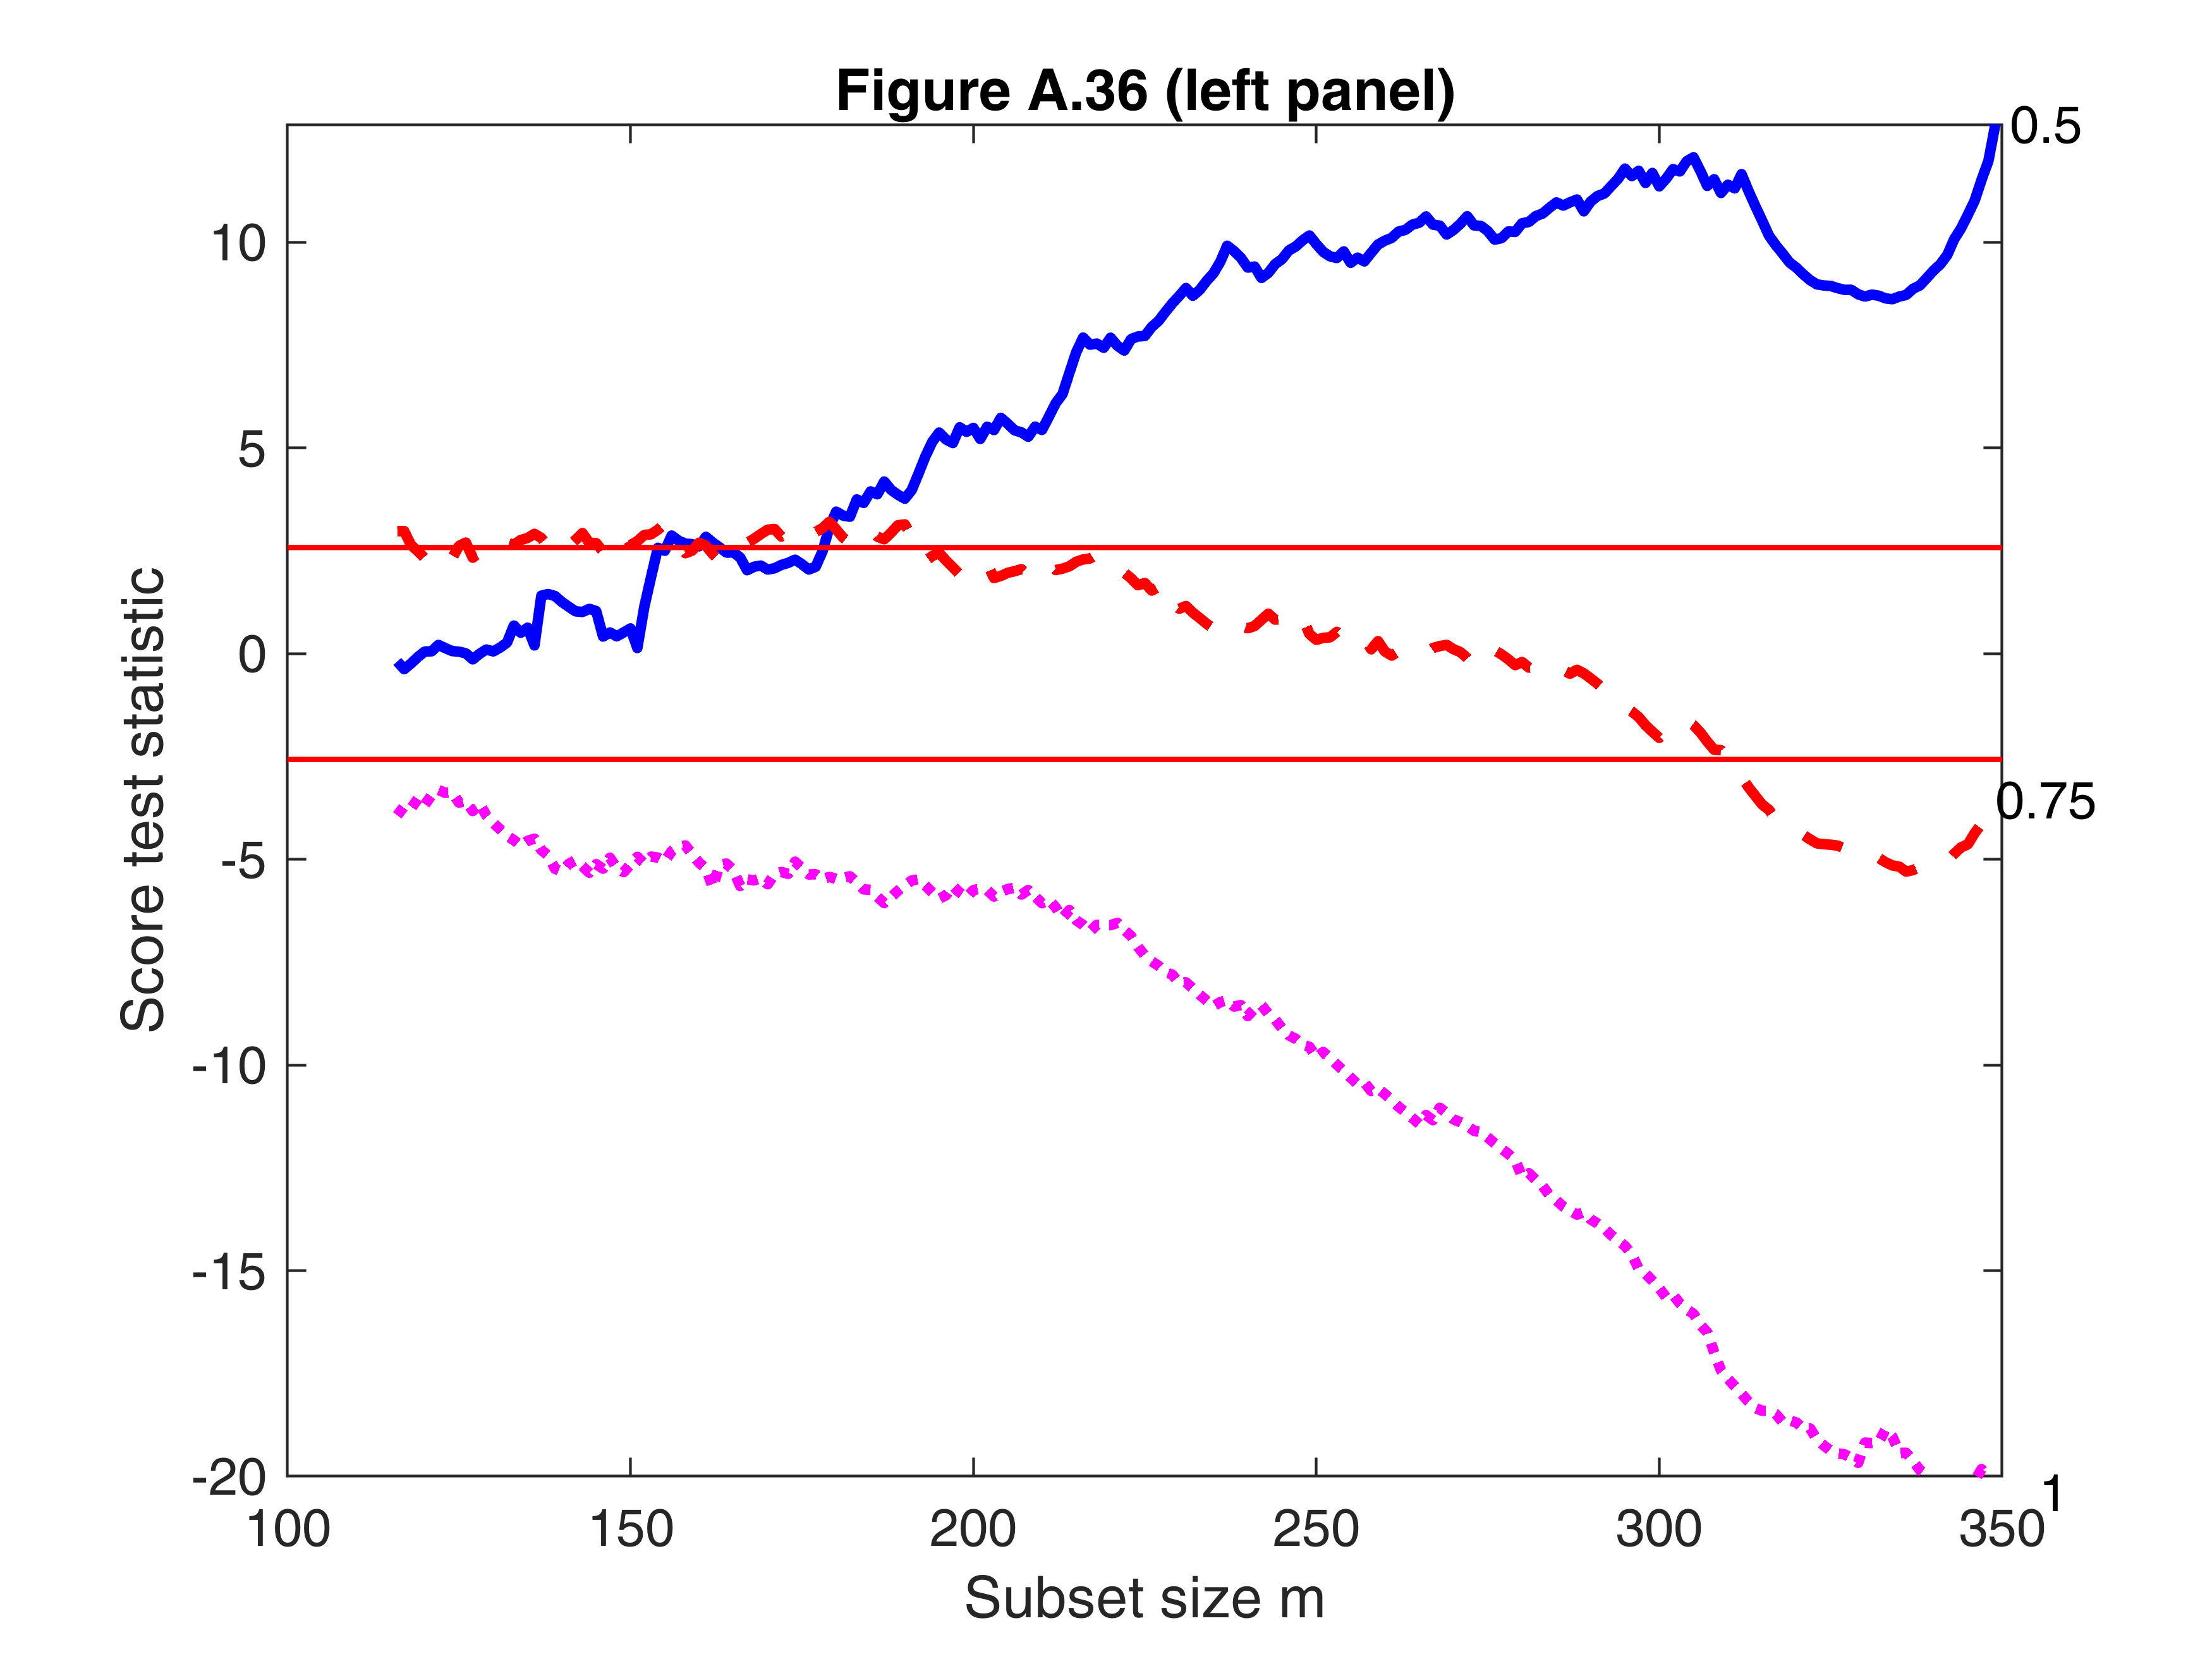

In [2]:
la=[0.5 0.75 1];
ylimy='';
out=FSRfan(y,X,'la',la,'family','YJ','plots',1,'init',round(n/3),'ylimy',[-ylimy ylimy],'msg',0);
title('')

title('Figure A.36 (left panel)')
set(gcf,"Name",'Figure A.36 (left panel)')

In [3]:

% fanplot(out)
if prin==1
    print -depsc figs\NPfan.eps
end

## Create Figure A.36 (right panel)

fanplotpn (extended fanplot)



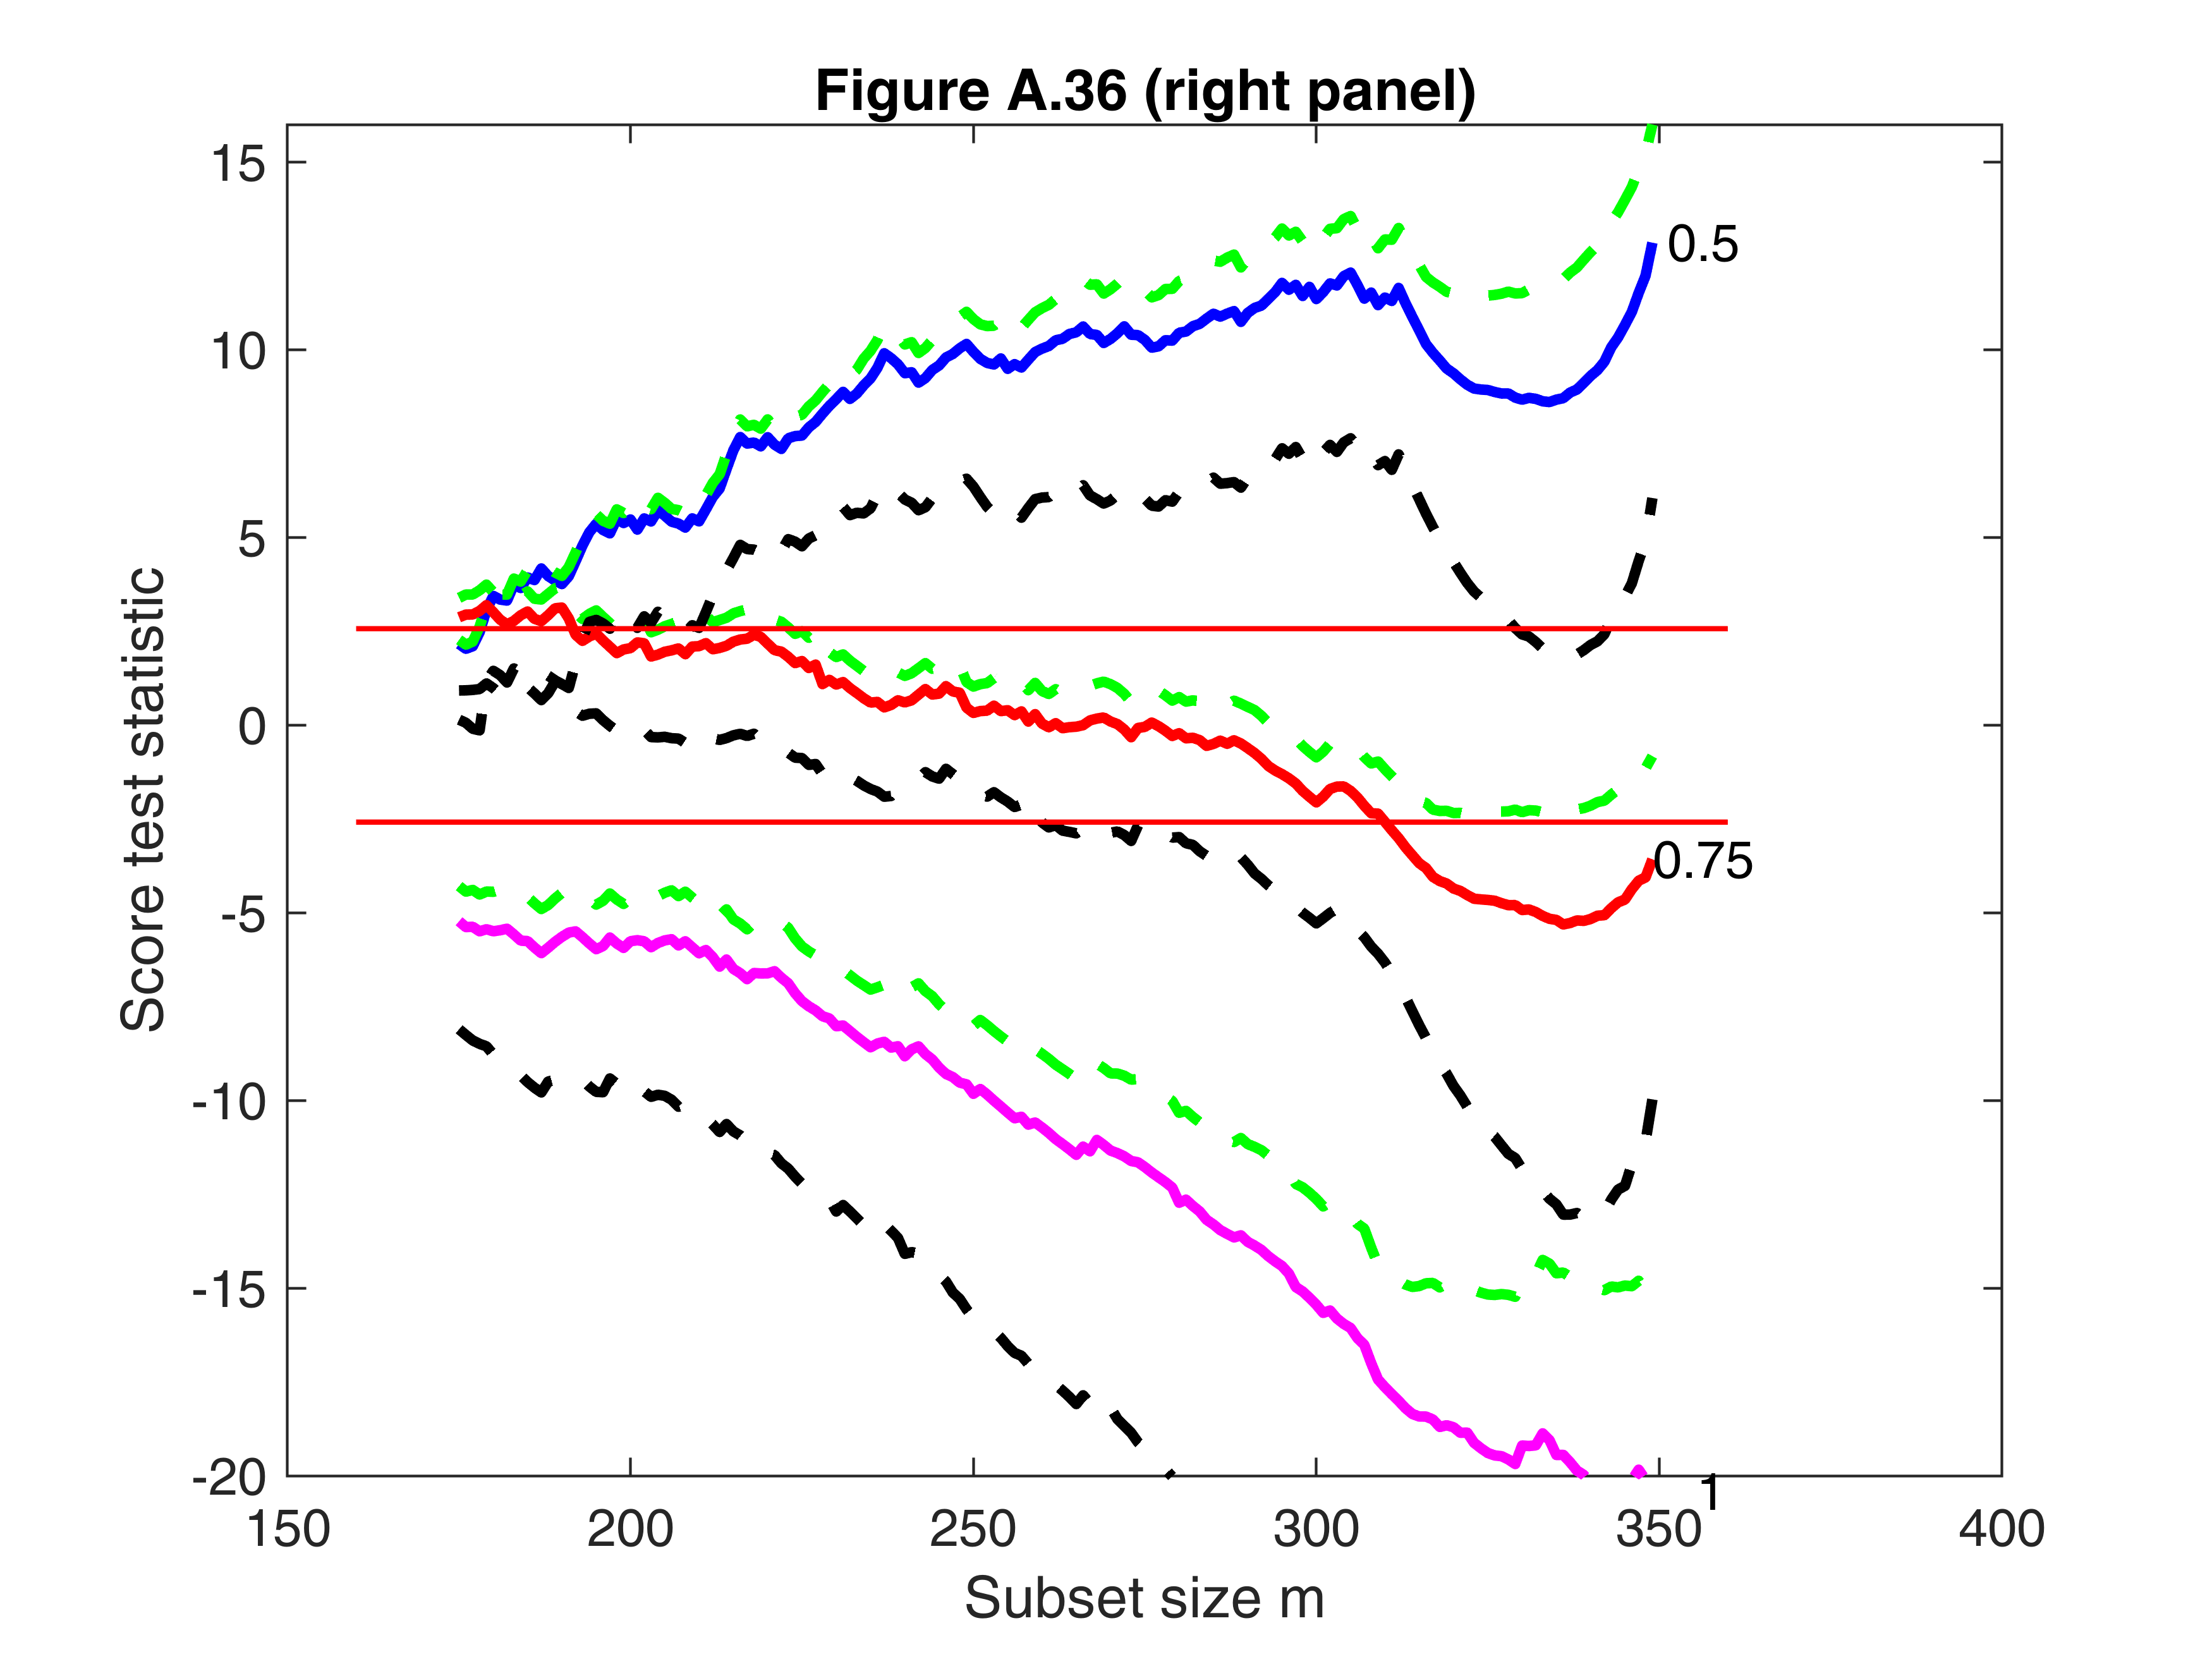

In [4]:
la=[0.5 0.75 1];
ylimy='';
out=FSRfan(y,X,'la',la,'family','YJpn','plots',1,'init',round(n/2), ...
    'ylimy',[-ylimy ylimy],'msg',0,'tag','plfanpn');
title('')

title('Figure A.36 (right panel)')
set(gcf,"Name",'Figure A.36 (right panel)')

In [5]:

if prin==1
    print -depsc figs\NPfanpn.eps
end

## Automatic procedure

In [6]:
[outFSRfan]=FSRfan(y,X,'plots',0,'init',round(n*0.3),'nsamp',10000,'la',[0 0.25 0.5 0.75 1 1.25],'msg',0,'family','YJ');
[outini]=fanBIC(outFSRfan,'plots',0);
if prin==1
    % print to postscript
    print -depsc figs\NPauto.eps;
end
% labest is the best value imposing the constraint that positive and
% negative observations must have the same tramsformation parameter.
labest=outini.labest;
disp('Best value of lambda (just using one lambda) from the automatic procedure')

Best value of lambda (just using one lambda) from the automatic procedure

In [7]:
disp(['lambda=' num2str(labest)])

lambda=0.75

## Create Figures A.37 and A.38

Automatic procedure


In [8]:
[outFSRfanpn]=FSRfan(y,X,'msg',0,'family','YJpn','la',labest,'plots',0);
out1=fanBICpn(outFSRfanpn);

Analyzing la_P=0.75 and la_N=0.75
Analyzing la_P=0.75 and la_N=0
Analyzing la_P=0.75 and la_N=0.25
Analyzing la_P=0.75 and la_N=0.5
Analyzing la_P=1 and la_N=0
Analyzing la_P=1 and la_N=0.25
Analyzing la_P=1 and la_N=0.75
Analyzing la_P=1 and la_N=0.5
Analyzing la_P=1.25 and la_N=0
Analyzing la_P=1.25 and la_N=0.25
Analyzing la_P=1.25 and la_N=0.75
Analyzing la_P=1.25 and la_N=0.5
Analyzing la_P=1.5 and la_N=0
Analyzing la_P=1.5 and la_N=0.25
Analyzing la_P=1.5 and la_N=0.75
Analyzing la_P=1.5 and la_N=0.5


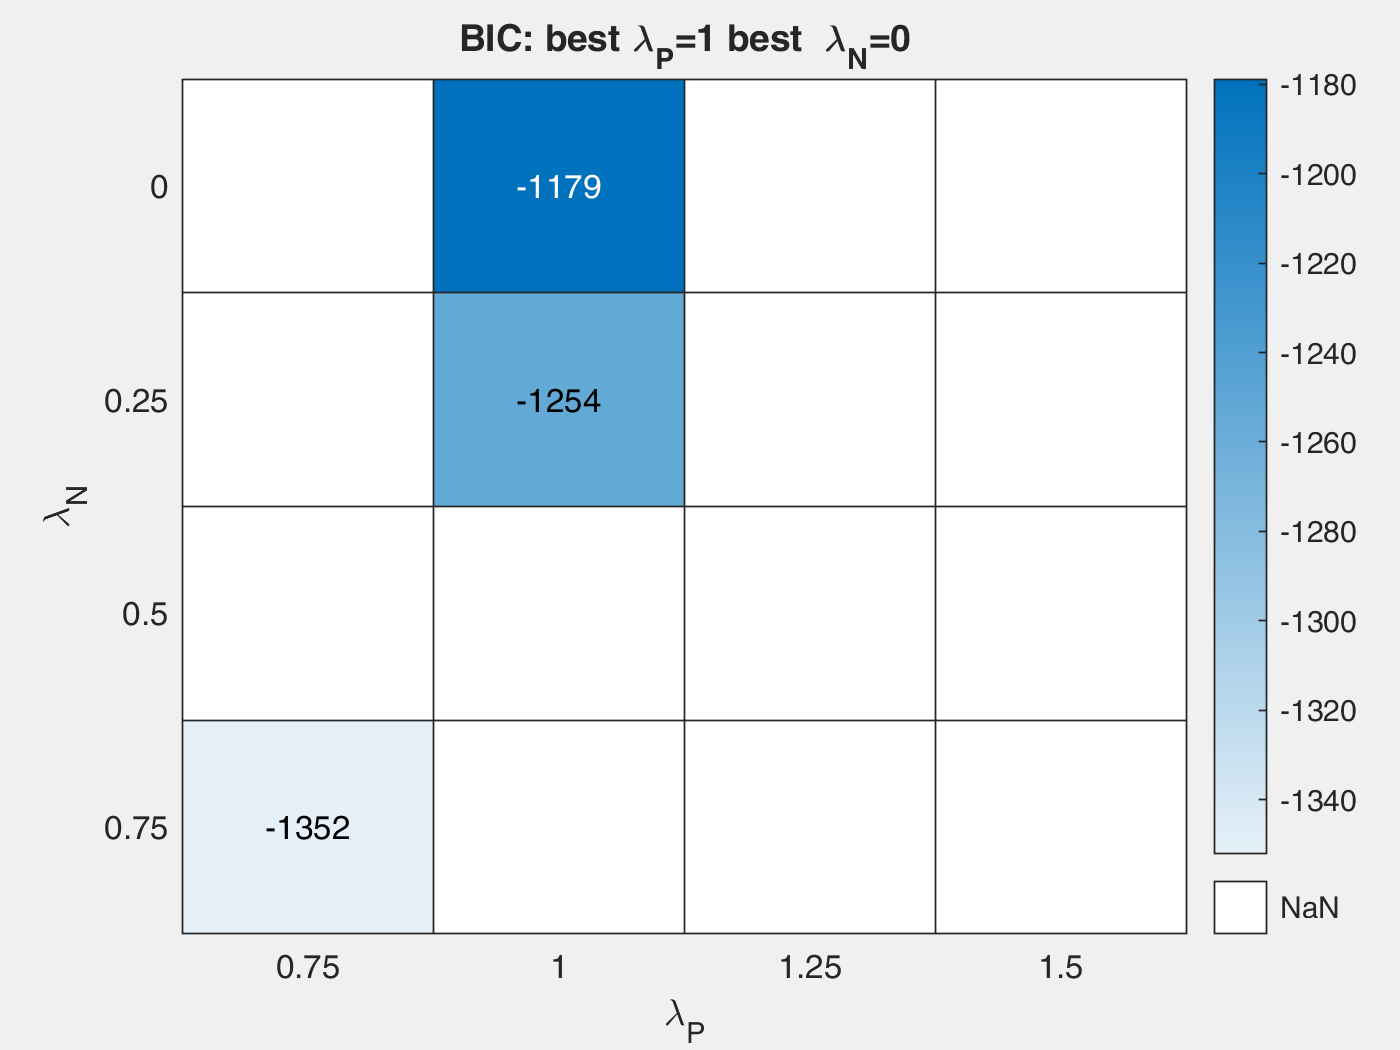

In [9]:

fig=findobj(0,'tag','pl_BIC');
figure(fig(1))
set(gcf,'Name', 'Figure A.37 (left panel)');


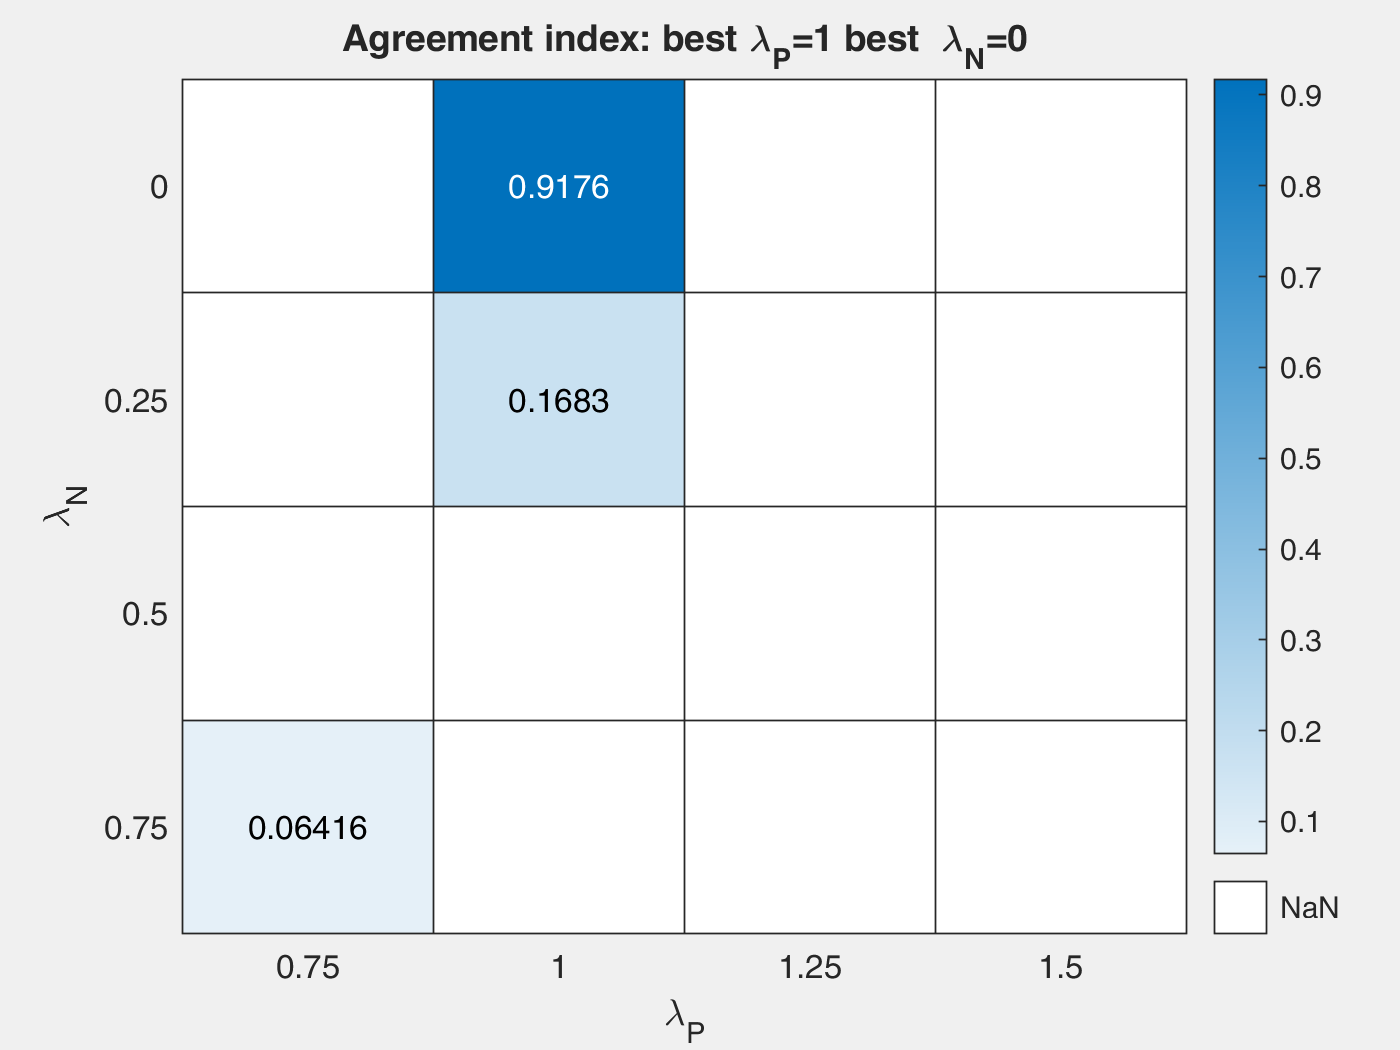

In [10]:

fig=findobj(0,'tag','pl_AGI');
figure(fig(1))
set(gcf,'Name', 'Figure A.37 (right panel)');


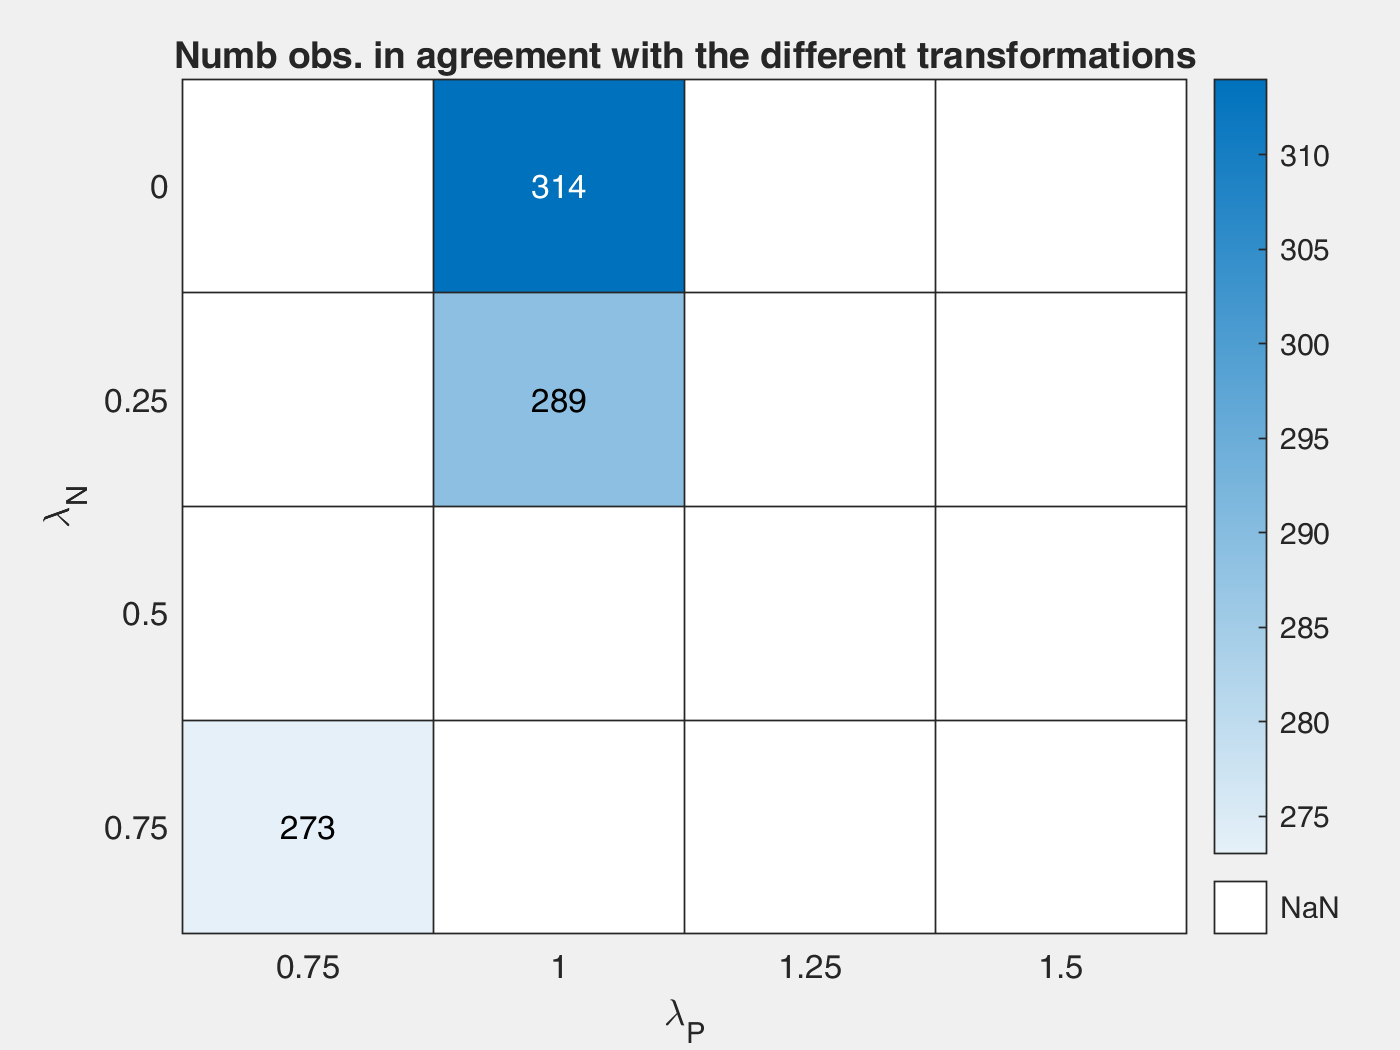

In [11]:

fig=findobj(0,'tag','pl_nobs');
figure(fig(1))
set(gcf,'Name', 'Figure A.38 (left panel)');


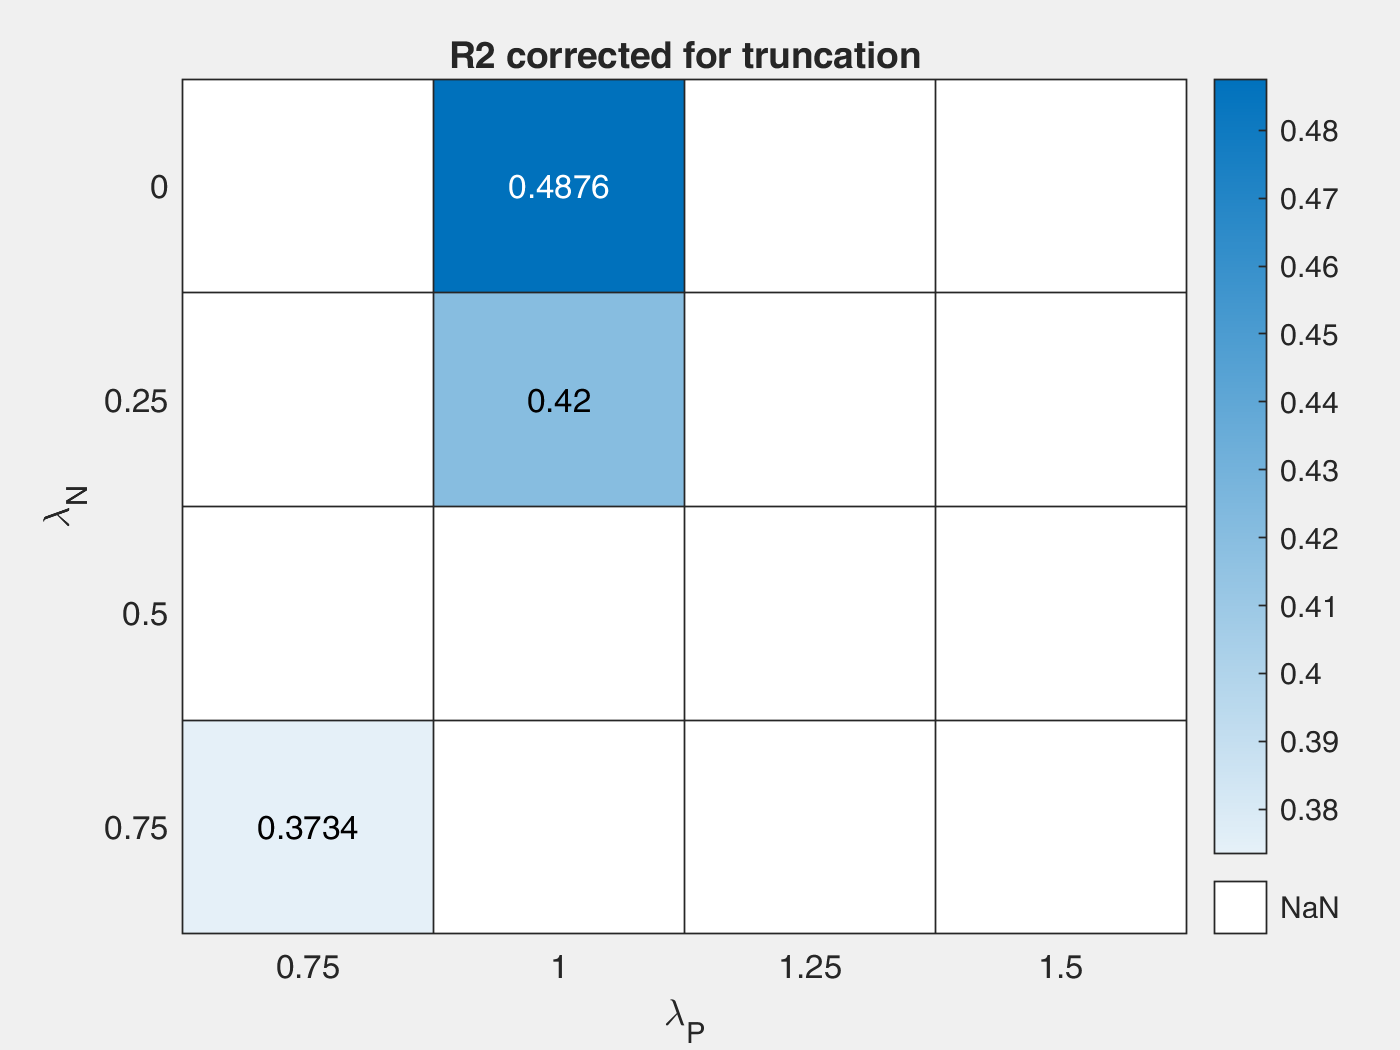

In [12]:

fig=findobj(0,'tag','pl_R2c');
figure(fig(1))
set(gcf,'Name', 'Figure A.38 (right panel)');

In [13]:

if prin==1
    % print to postscript
    print -depsc figs\NPautopnh.eps;
    print -depsc figs\NPautopnBIC.eps;
    print -depsc figs\NPautopnAGI.eps;
    print -depsc figs\NPautopnR2.eps;
end

## Prepare the input for Figure A.39

Transformation


In [14]:
ytra=normYJpn(y, [], [1, 0], 'inverse',false, 'Jacobian', false);
out=FSR(ytra,X,'plots',0);

Observed curve of r_min is at least 10 times greater than 99.99% envelope
--------------------------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=290 because
rmin(290,349)>99.99% and rmin(289,349)>99.99% and rmin(291,349)>99.99%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=289
Superimposition stopped because r_{min}(304,315)>99.9% envelope
Subsample of 314 units is homogeneous
----------------------------
Final output
Number of units declared as outliers=35
Summary of the exceedances
           1          99         999        9999       99999
           2          94          71          58          49

In [15]:
disp(['Number of outliers found in the transformed scale=' num2str(length(out.outliers))])

Number of outliers found in the transformed scale=35

In [16]:

if prin==1
    % print to postscript
    print -depsc figs\NPfsr.eps;
end
% Find the two groups (good units and outliers)
seq=1:n;
outliers=out.outliers;
sel=setdiff(seq,outliers);
ytrag=ytra(sel);
Xg=X(sel,:);

## Create Figure A.39


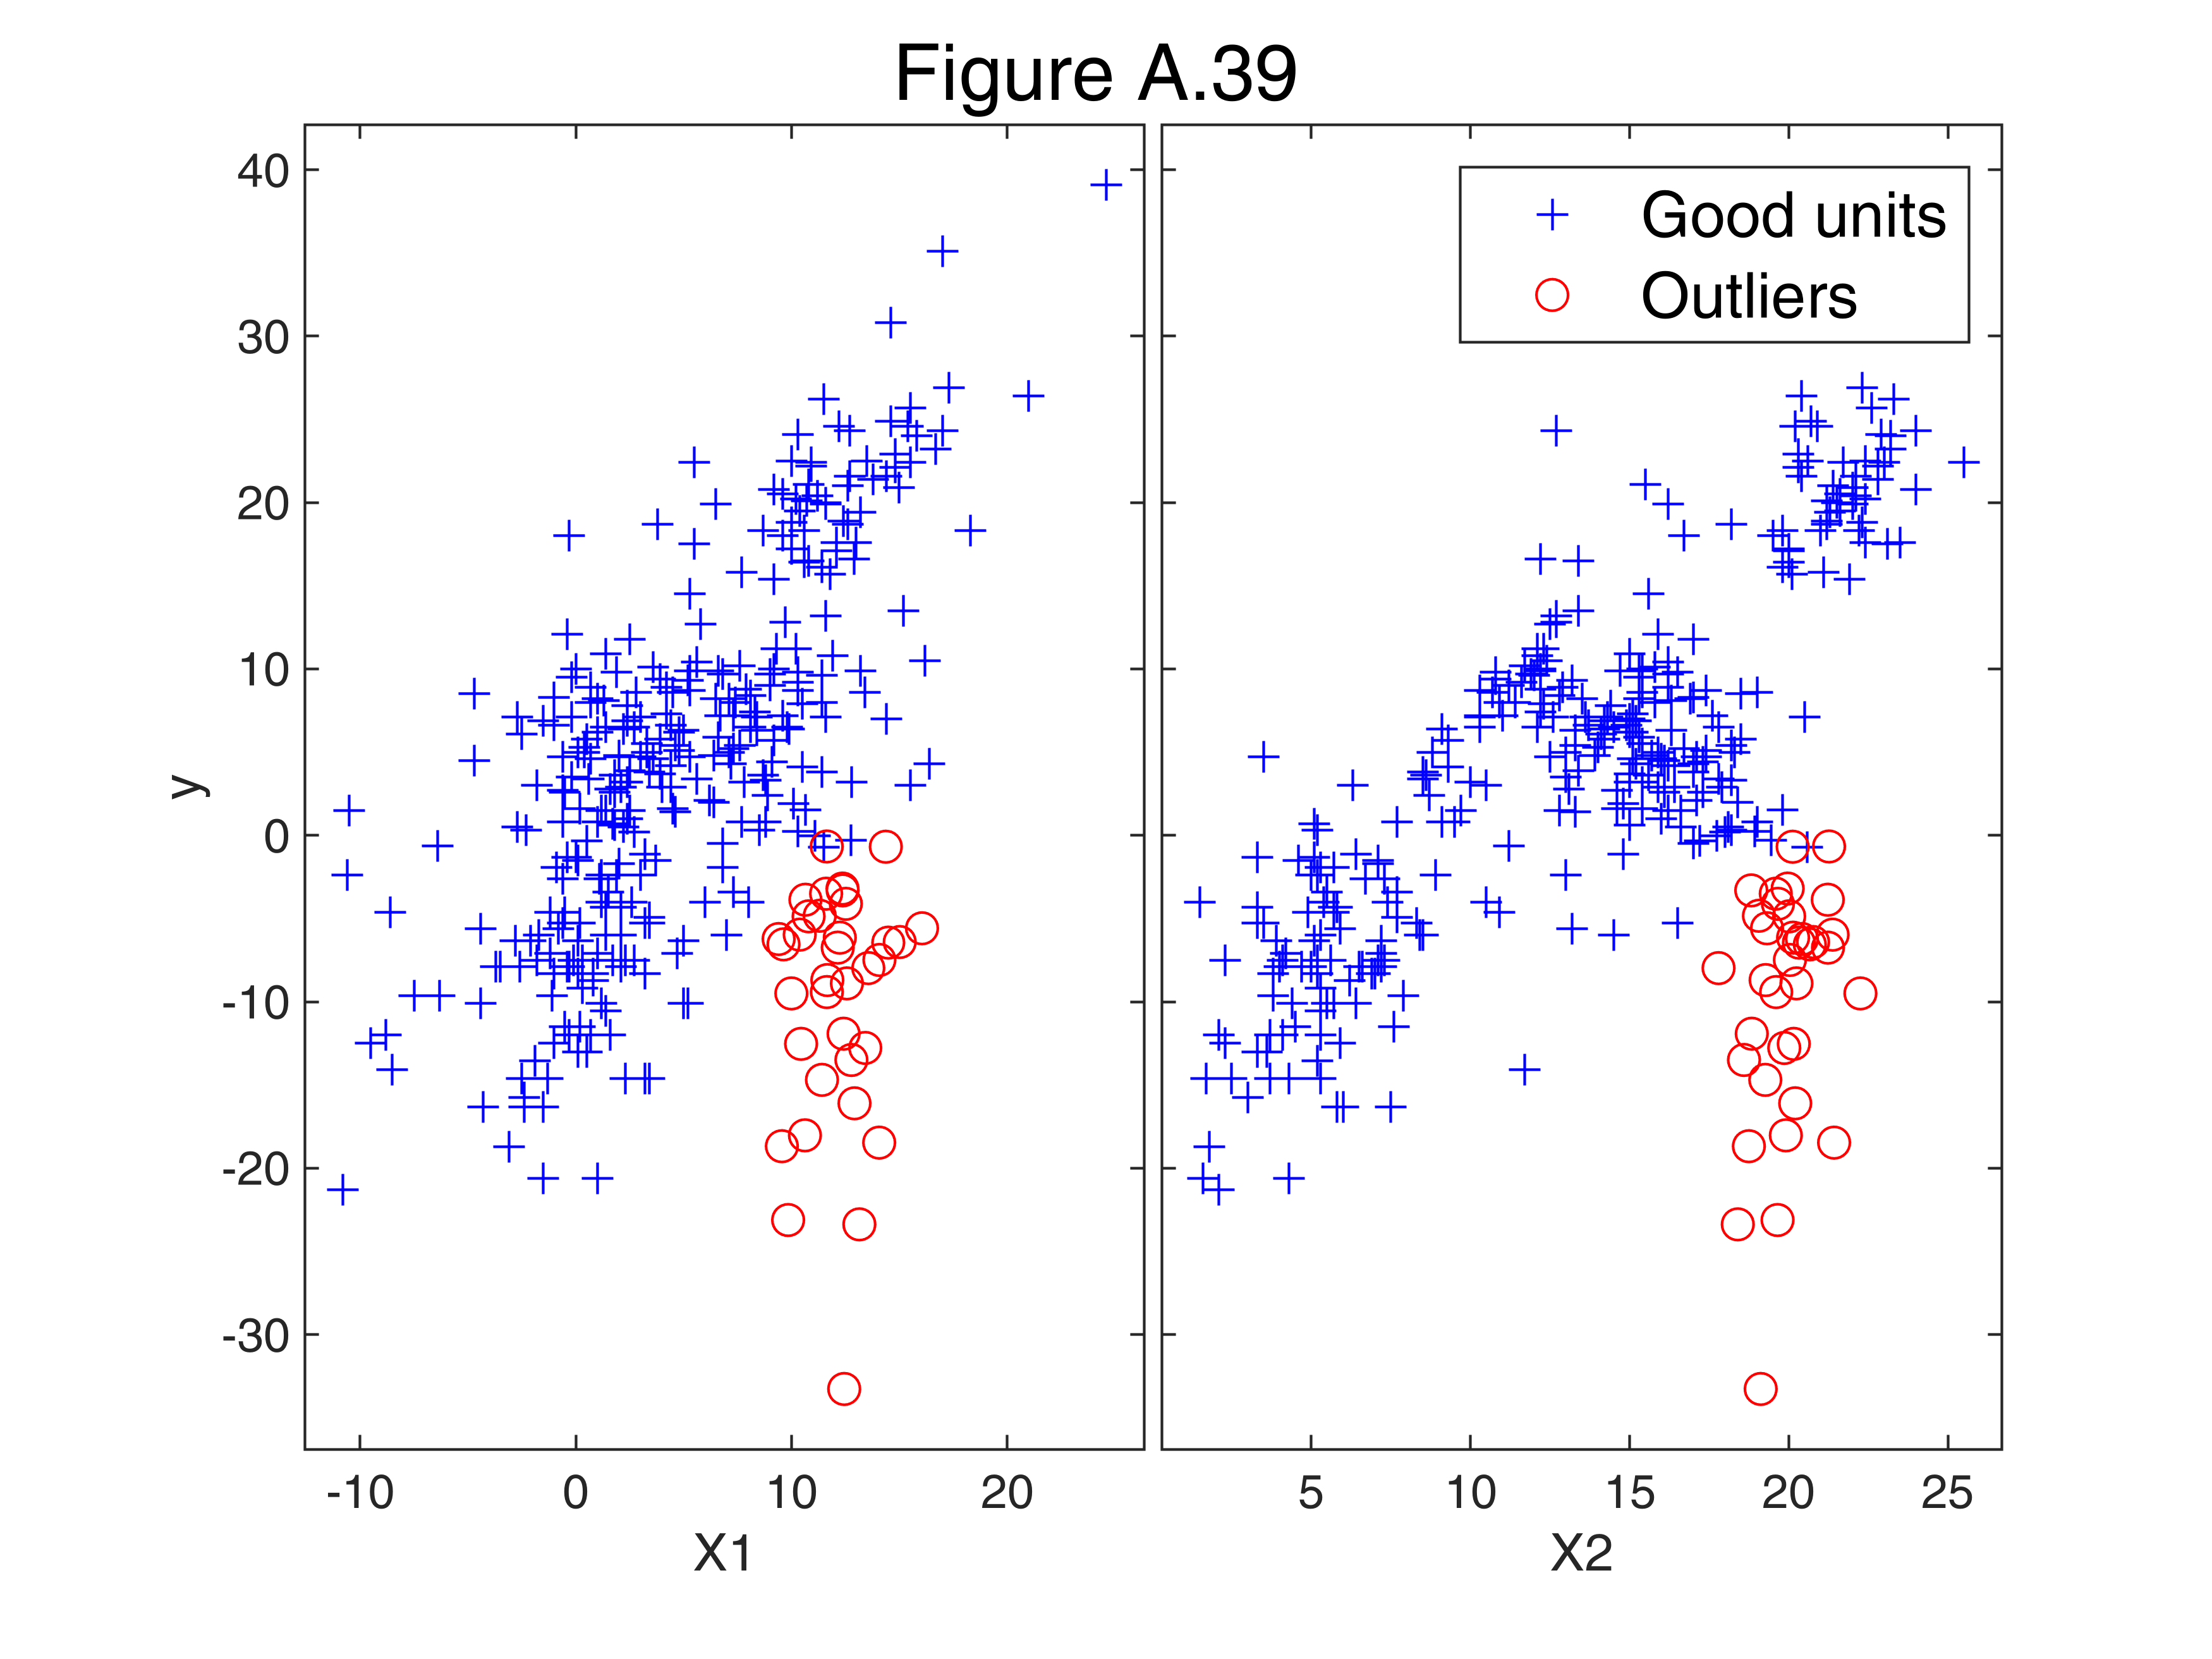

In [17]:
group=repelem("Good units",n,1);
group(outliers)="Outliers";
group=cellstr(group);
yXplot(ytra,X,group,'tag','pl_ytra');
sgtitle('Figure A.39 ')
set(gcf,"Name",'Figure A.39')

## Create figure A.40

Comparison of normal QQ plots of residuals



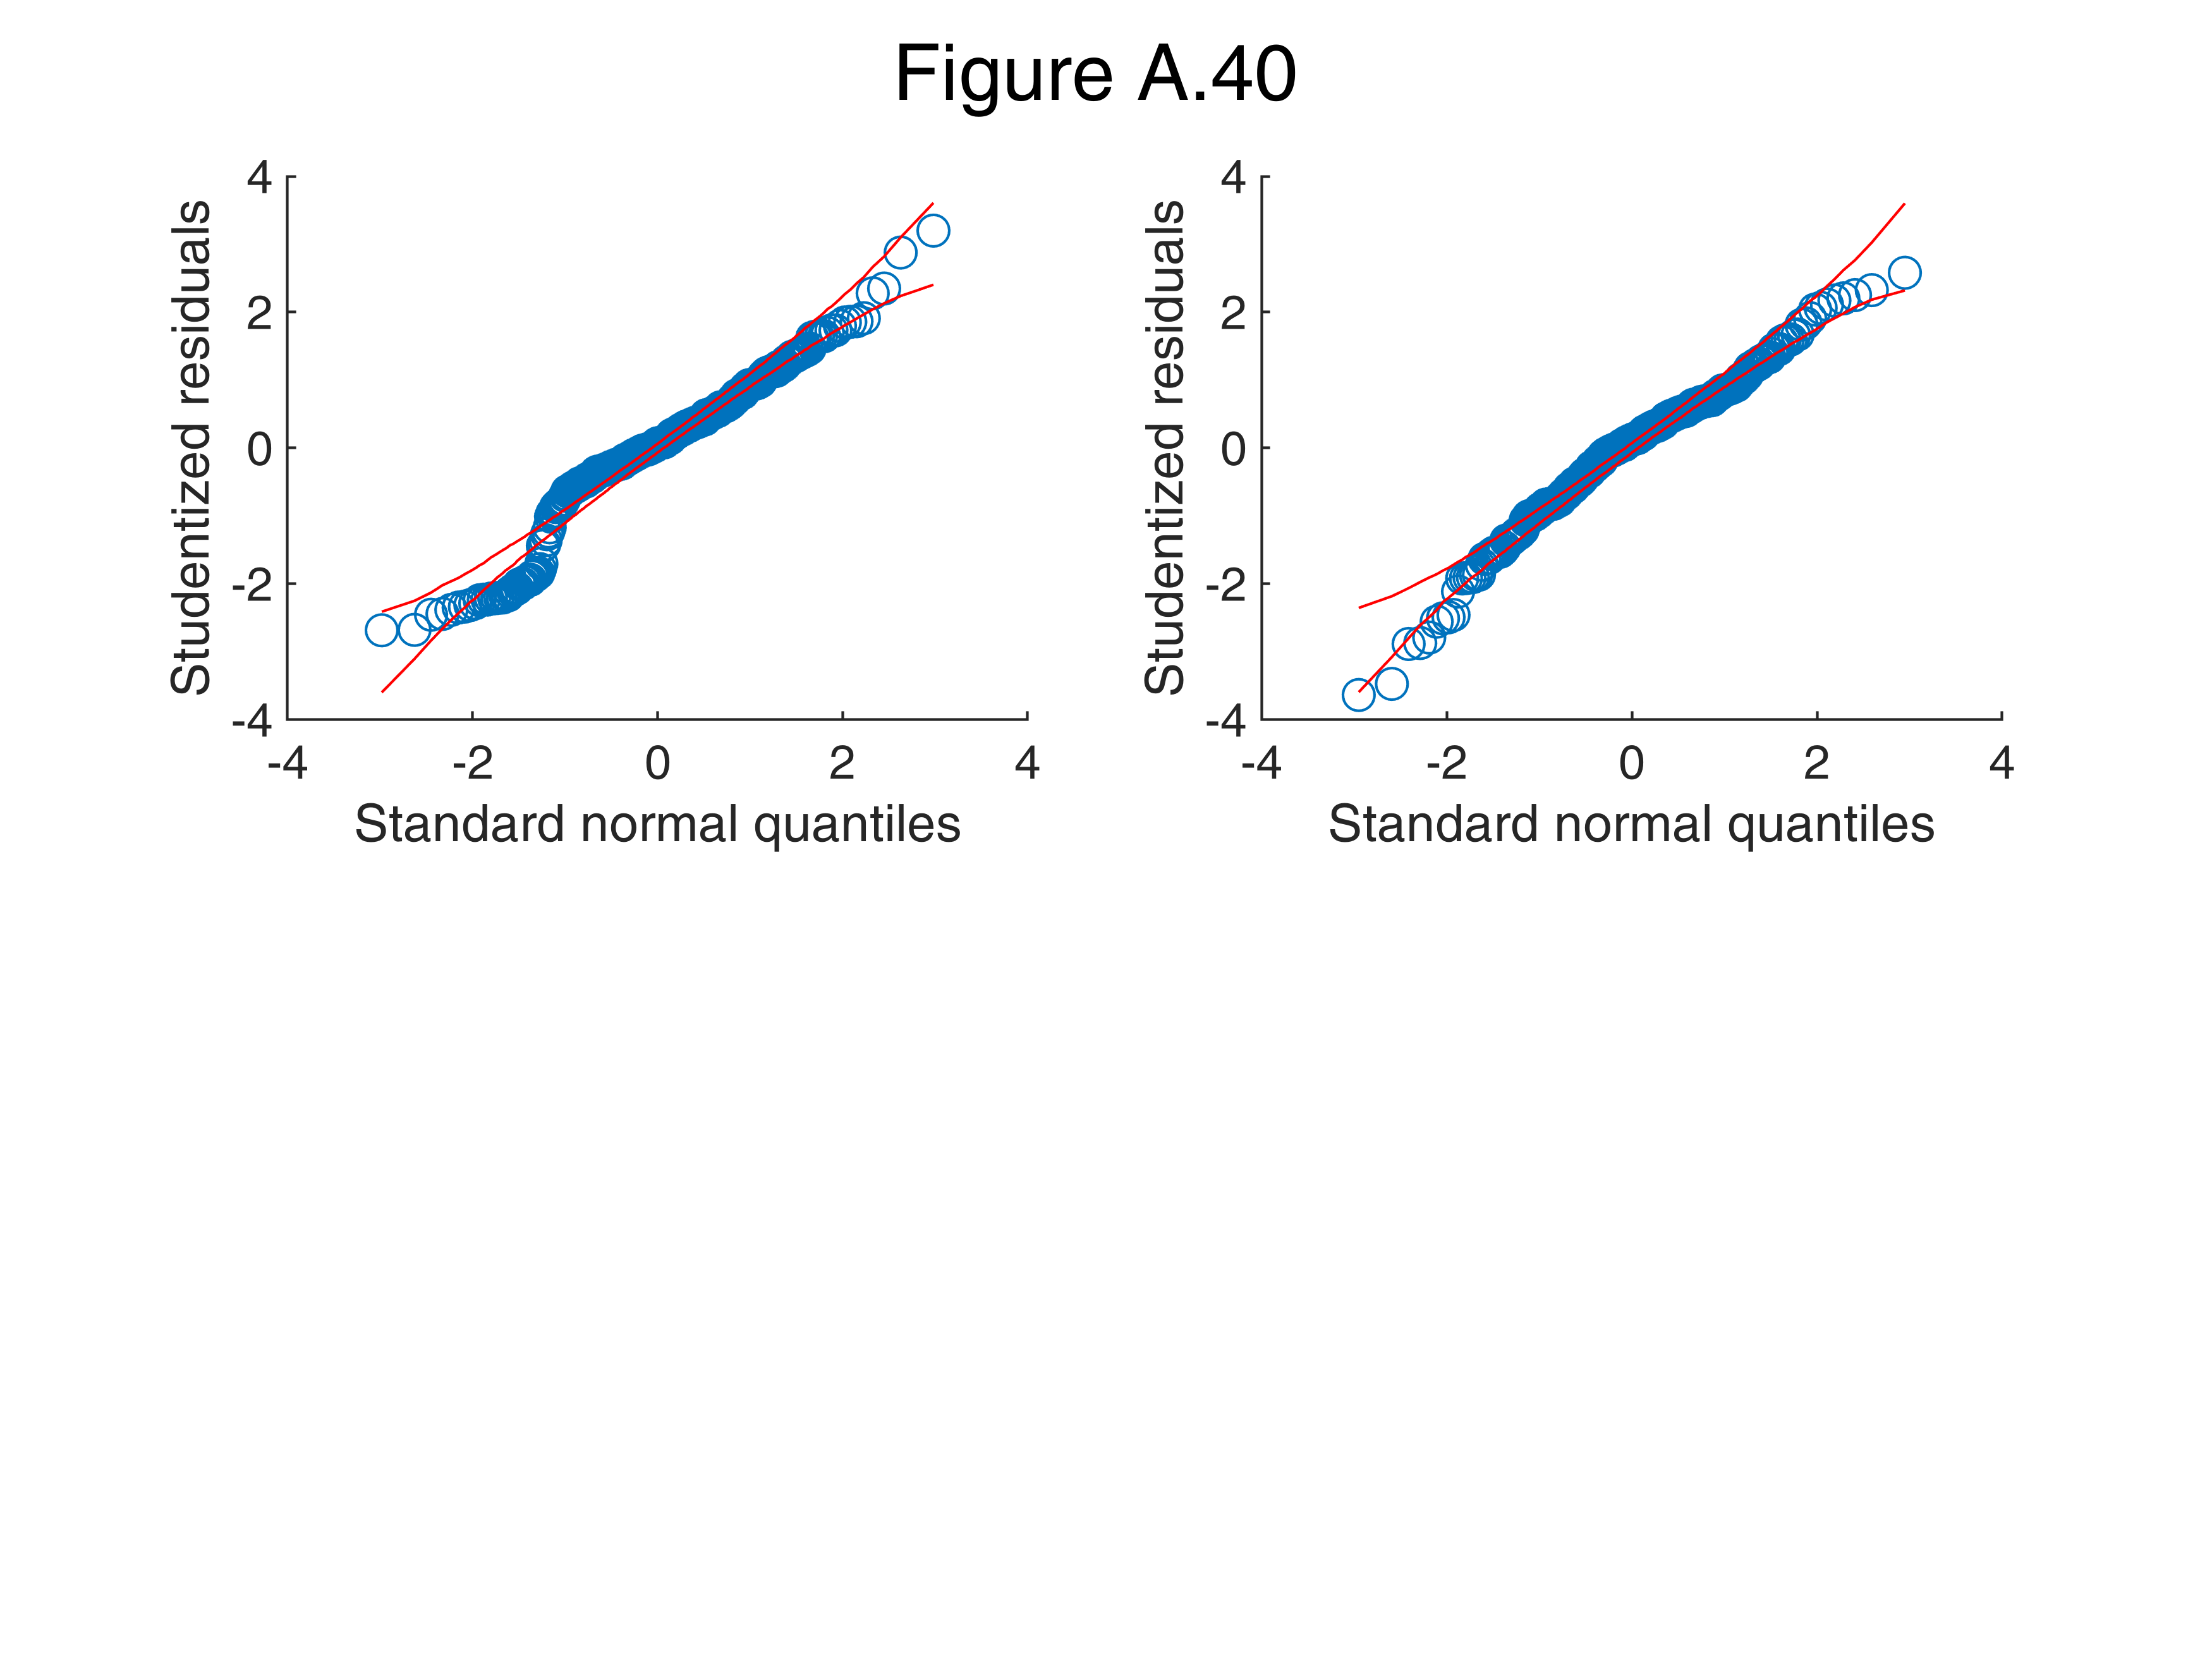

In [18]:
nr=2;
nc=2;
figure
% residuals in the original scale
h1=subplot(nr,nc,1);
outLMy=fitlm(X,y);
restra=outLMy.Residuals{:,3};
qqplotFS(restra,'X',X,'plots',1,'h',h1);

% residual for the transformed EYJ scale (without the outliers)
h2=subplot(nr,nc,2);
outLMytrag=fitlm(Xg,ytrag);
restra=outLMytrag.Residuals{:,3};
qqplotFS(restra,'X',Xg,'plots',1,'h',h2);

sgtitle('Figure A.40 ')
set(gcf,"Name",'Figure A.40')

In [19]:

if prin==1
    % print to postscript
    print -depsc figs\NP1.eps;
end

## Create Figure A.41


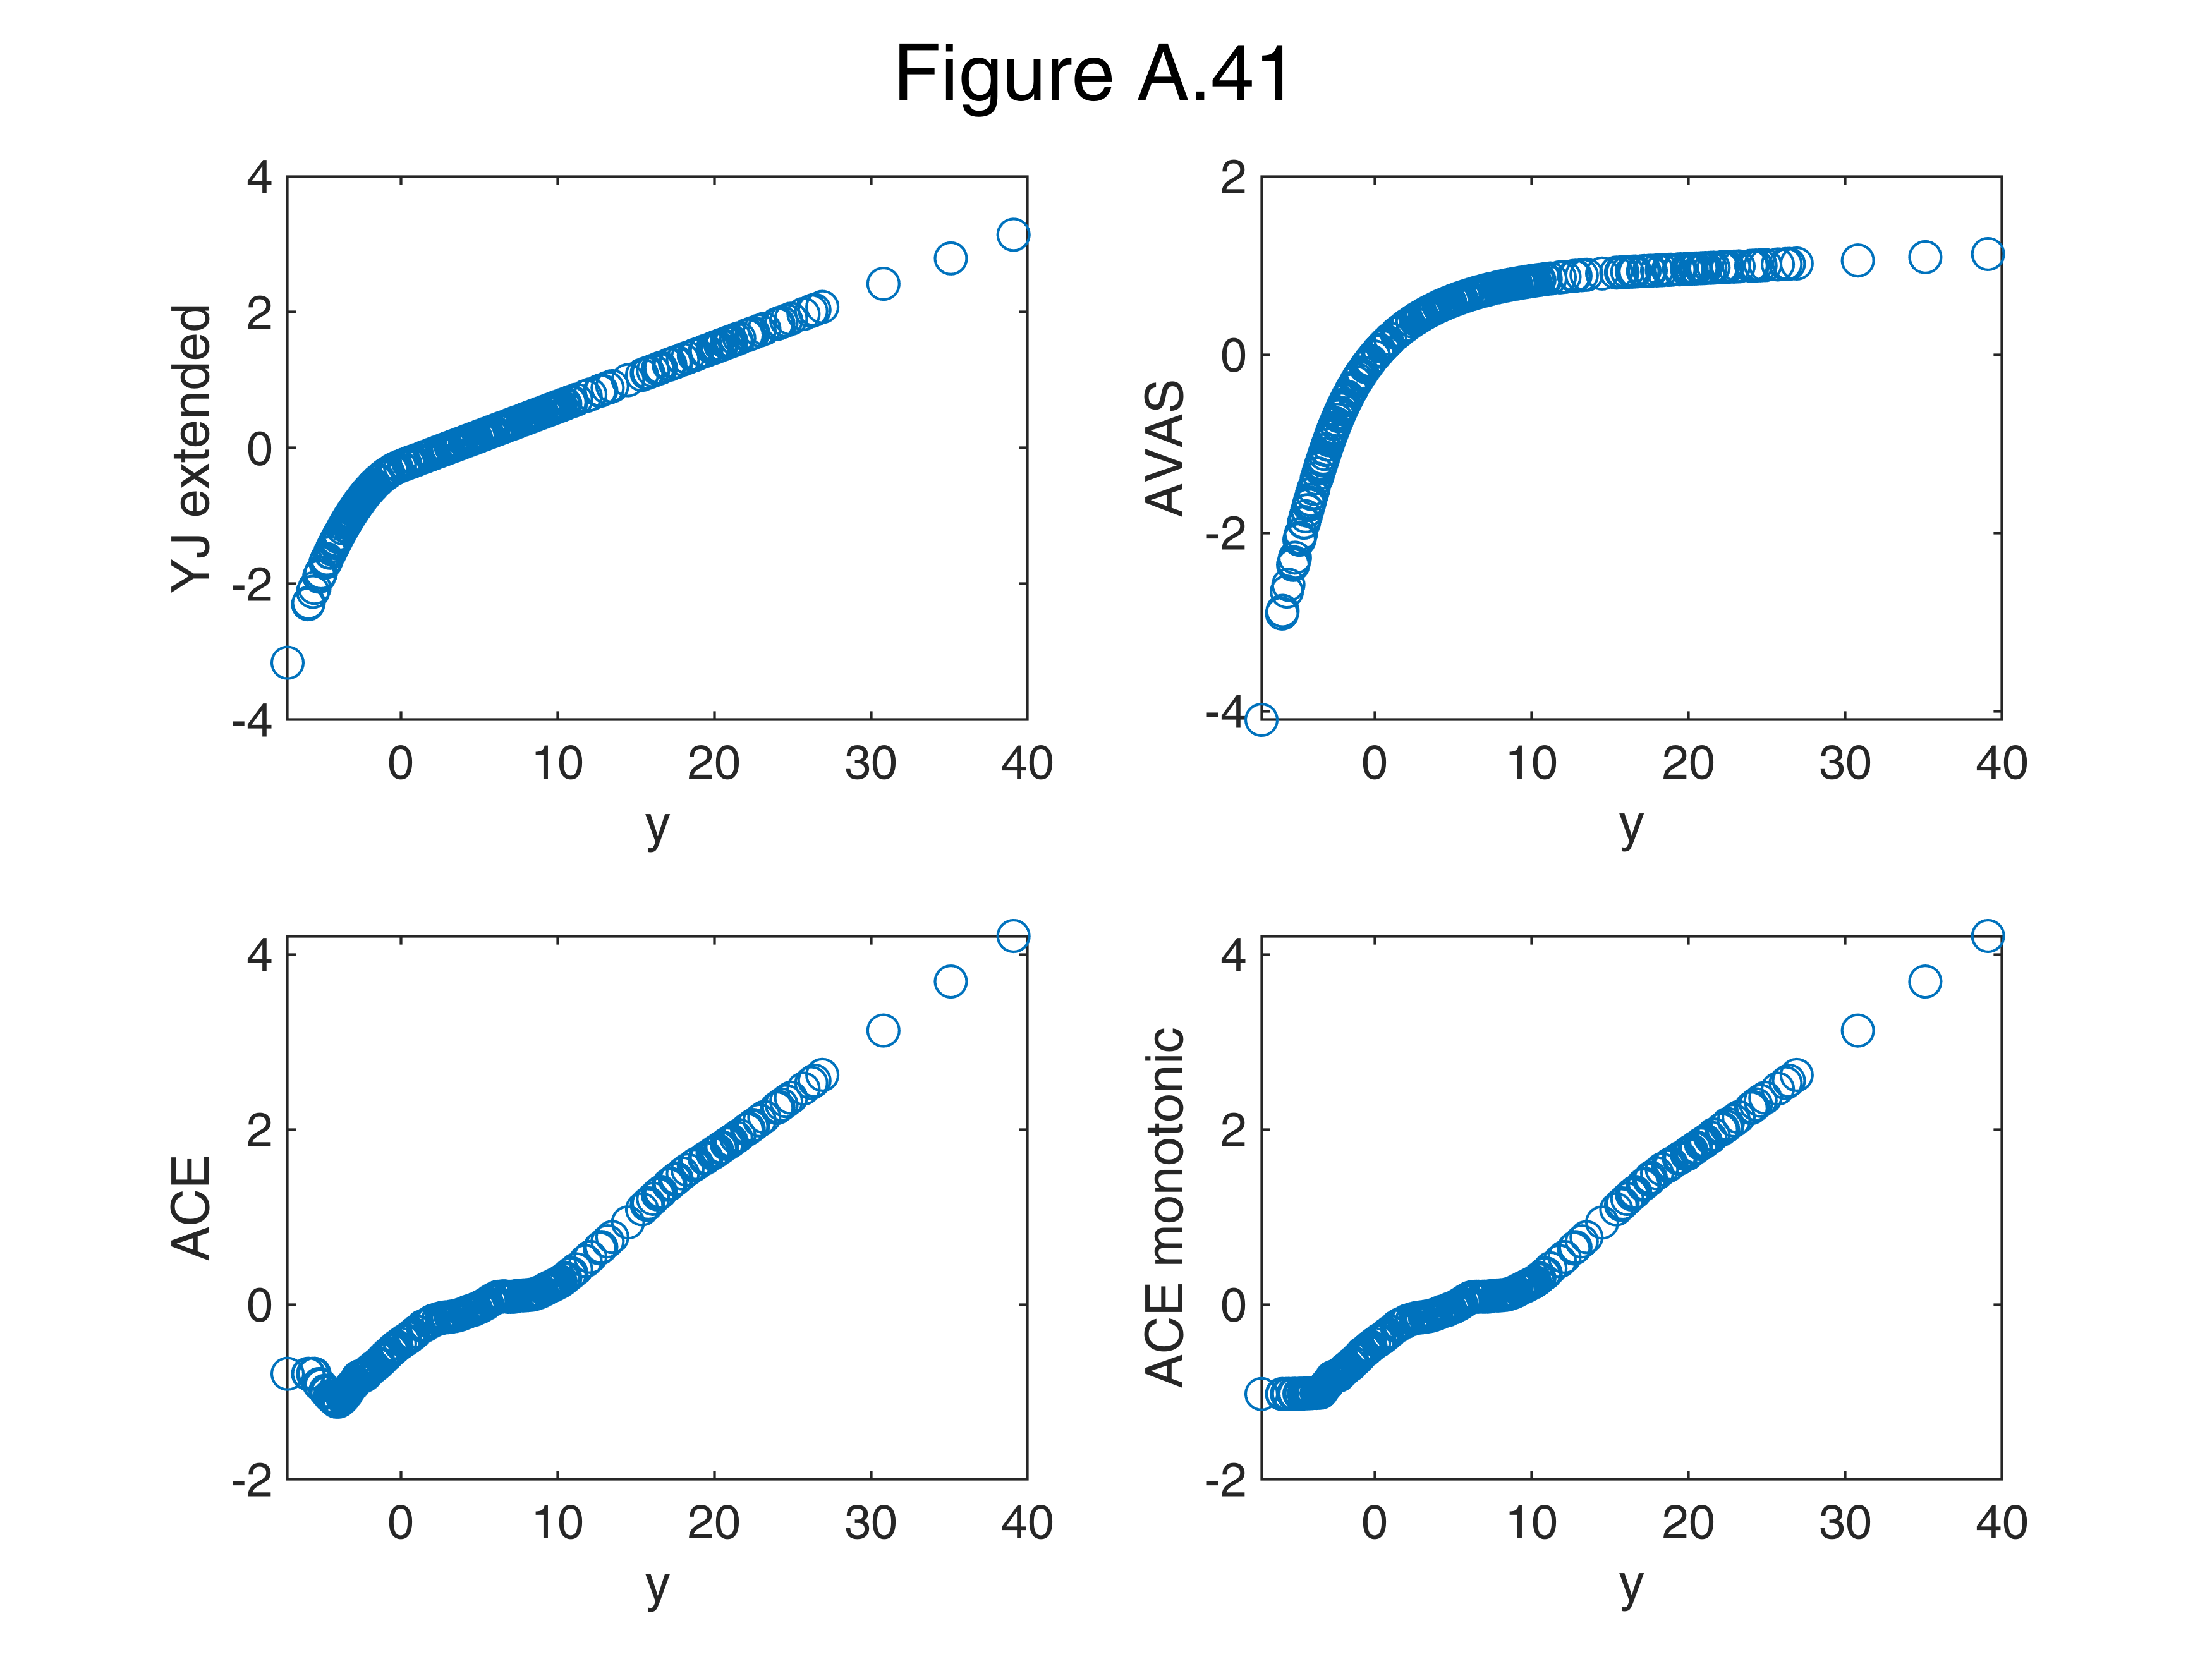

In [20]:
figure
subplot(2,2,1)
plot(y,zscore(ytra),'o')
ylabel('YJ extended')
xlabel('y')

subplot(2,2,2)
l=4*ones(p,1);
outAVASy= avas(y,X,'l',l);
plot(y,outAVASy.ty,'o')
ylabel('AVAS')
xlabel('y')

subplot(2,2,3)
% ACE  (non monotonic)
l=[4*ones(p,1); 1];
outACE= ace(y,X,'l',l);
plot(y,outACE.ty,'o')
ylabel('ACE')
xlabel('y')

subplot(2,2,4)
% ACE  (monotonic)
l=[4*ones(p,1); 3];
outACEcy= ace(y,X,'l',l);
plot(y,outACEcy.ty,'o')
ylabel('ACE monotonic')
xlabel('y')

if prin==1
    % print to postscript
    print -depsc figs\NP2.eps;
end

sgtitle('Figure A.41 ')
set(gcf,"Name",'Figure A.41')

## Create Table A.18

In [21]:
A18=zeros(5,2);
% First row of Table A.18 OLS
R2y=outLMy.Rsquared.Ordinary;
A18(1,:)=[R2y NaN];

% Second row of Table A.18 (EYJ)
outLMytra=fitlm(X,ytra);
R2ytraEYJ=outLMytra.Rsquared.Ordinary;
R2ytragEYJ=outLMytrag.Rsquared.Ordinary;
A18(2,:)=[R2ytraEYJ R2ytragEYJ];

% Third row of Table A.18 (AVAS)
R2yAVAS=outAVASy.rsq;

l=4*ones(p,1);
outAVytrag= avas(ytrag,Xg,'l',l);
R2ytragAVAS=outAVytrag.rsq;
A18(3,:)=[R2yAVAS  R2ytragAVAS];

% Fourth row of Table A.18 (ACE)
R2yACE=outACE.rsq;
l=[4*ones(p,1); 1];
outACEytrag= ace(ytrag,Xg,'l',l);
R2ytragACE=outACEytrag.rsq;
A18(4,:)=[R2yACE R2ytragACE];

% Fifth row of Table A.18 (ACE monotonic)
R2yACEcy=outACEcy.rsq;

l=[4*ones(p,1); 3];
outACEcytrag= ace(ytrag,Xg,'l',l);
R2ytragACEc=outACEcytrag.rsq;
A18(5,:)=[R2yACEcy R2ytragACEc];

rownam=["Untransformed" "EYJ" "AVAS (no option)" "ACE" "ACE (monotonic)"];
colnam=["Contaminated" "Cleaned and transformed"];
A18t=array2table(A18,'RowNames',rownam,'VariableNames',colnam);
disp("Table A.18")

Table A.18

In [22]:
disp(A18t)

                        Contaminated    Cleaned and transformed
                        ____________    _______________________
    Untransformed         0.39912                   NaN        
    EYJ                   0.36008                0.7834        
    AVAS (no option)      0.24067               0.77836        
    ACE                   0.42091               0.80562        
    ACE (monotonic)       0.41693               0.80545

## Create Figure A.42

Create NP3 yres vs fitted original data



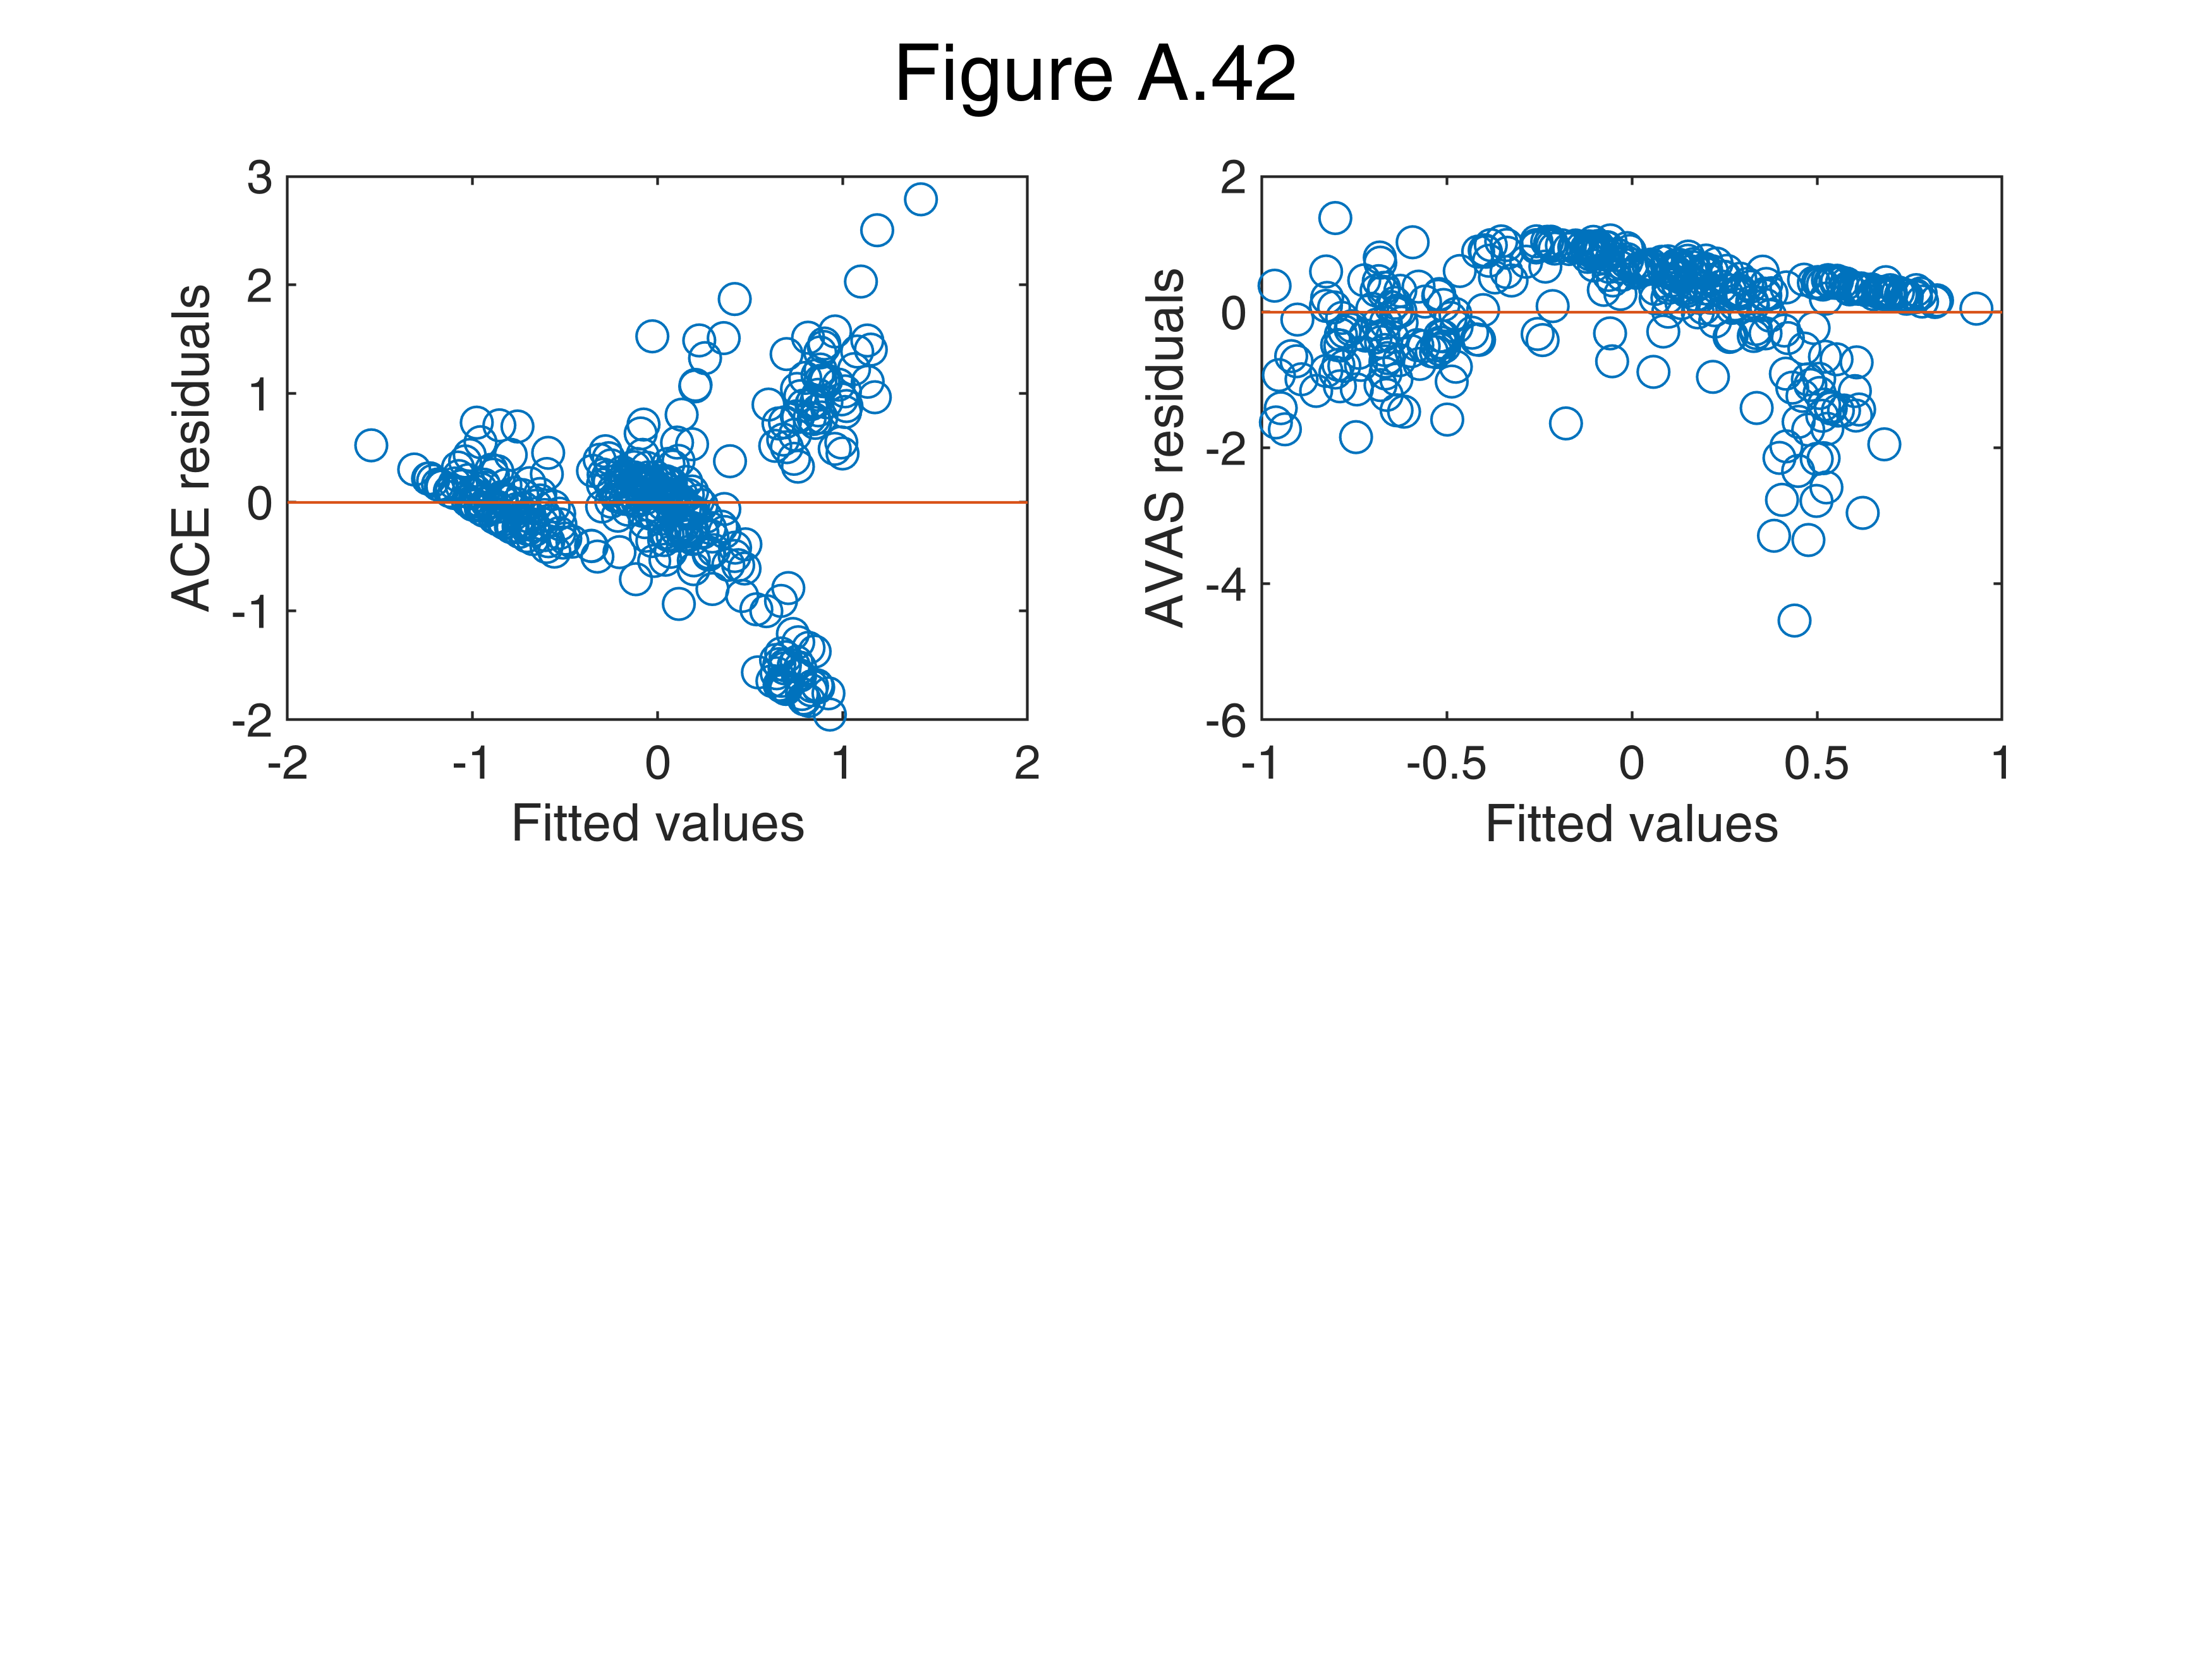

In [23]:
figure
subplot(2,2,1)
% l=[4*ones(p,1); 3];
% outACEc= ace(y,X,'l',l);
yhat=sum(outACEcy.tX,2);
res = outACEcy.ty - yhat;
plot(yhat,res,'o')
refline(0,0)
% title('Plot of residuals vs. fit')
ylabel('ACE residuals')
xlabel('Fitted values')

subplot(2,2,2)
% AVAS
yhat=sum(outAVASy.tX,2);

res = outAVASy.ty - yhat;
plot(yhat,res,'o')
refline(0,0)
% title('Plot of residuals vs. fit')
ylabel('AVAS residuals')
xlabel('Fitted values')

if prin==1
    % print to postscript
    print -depsc NP3.eps;
end
sgtitle('Figure A.42 ')
set(gcf,"Name",'Figure A.42')

## Create Figure A.43

Automatic selection of the options


In [24]:
outAVAS=avasms(y,X,'plots',0);

No model found with pvalDW>0.1 and pvalJB>0.1
Setting pvalDW=0.05 and pvalJB=0.05


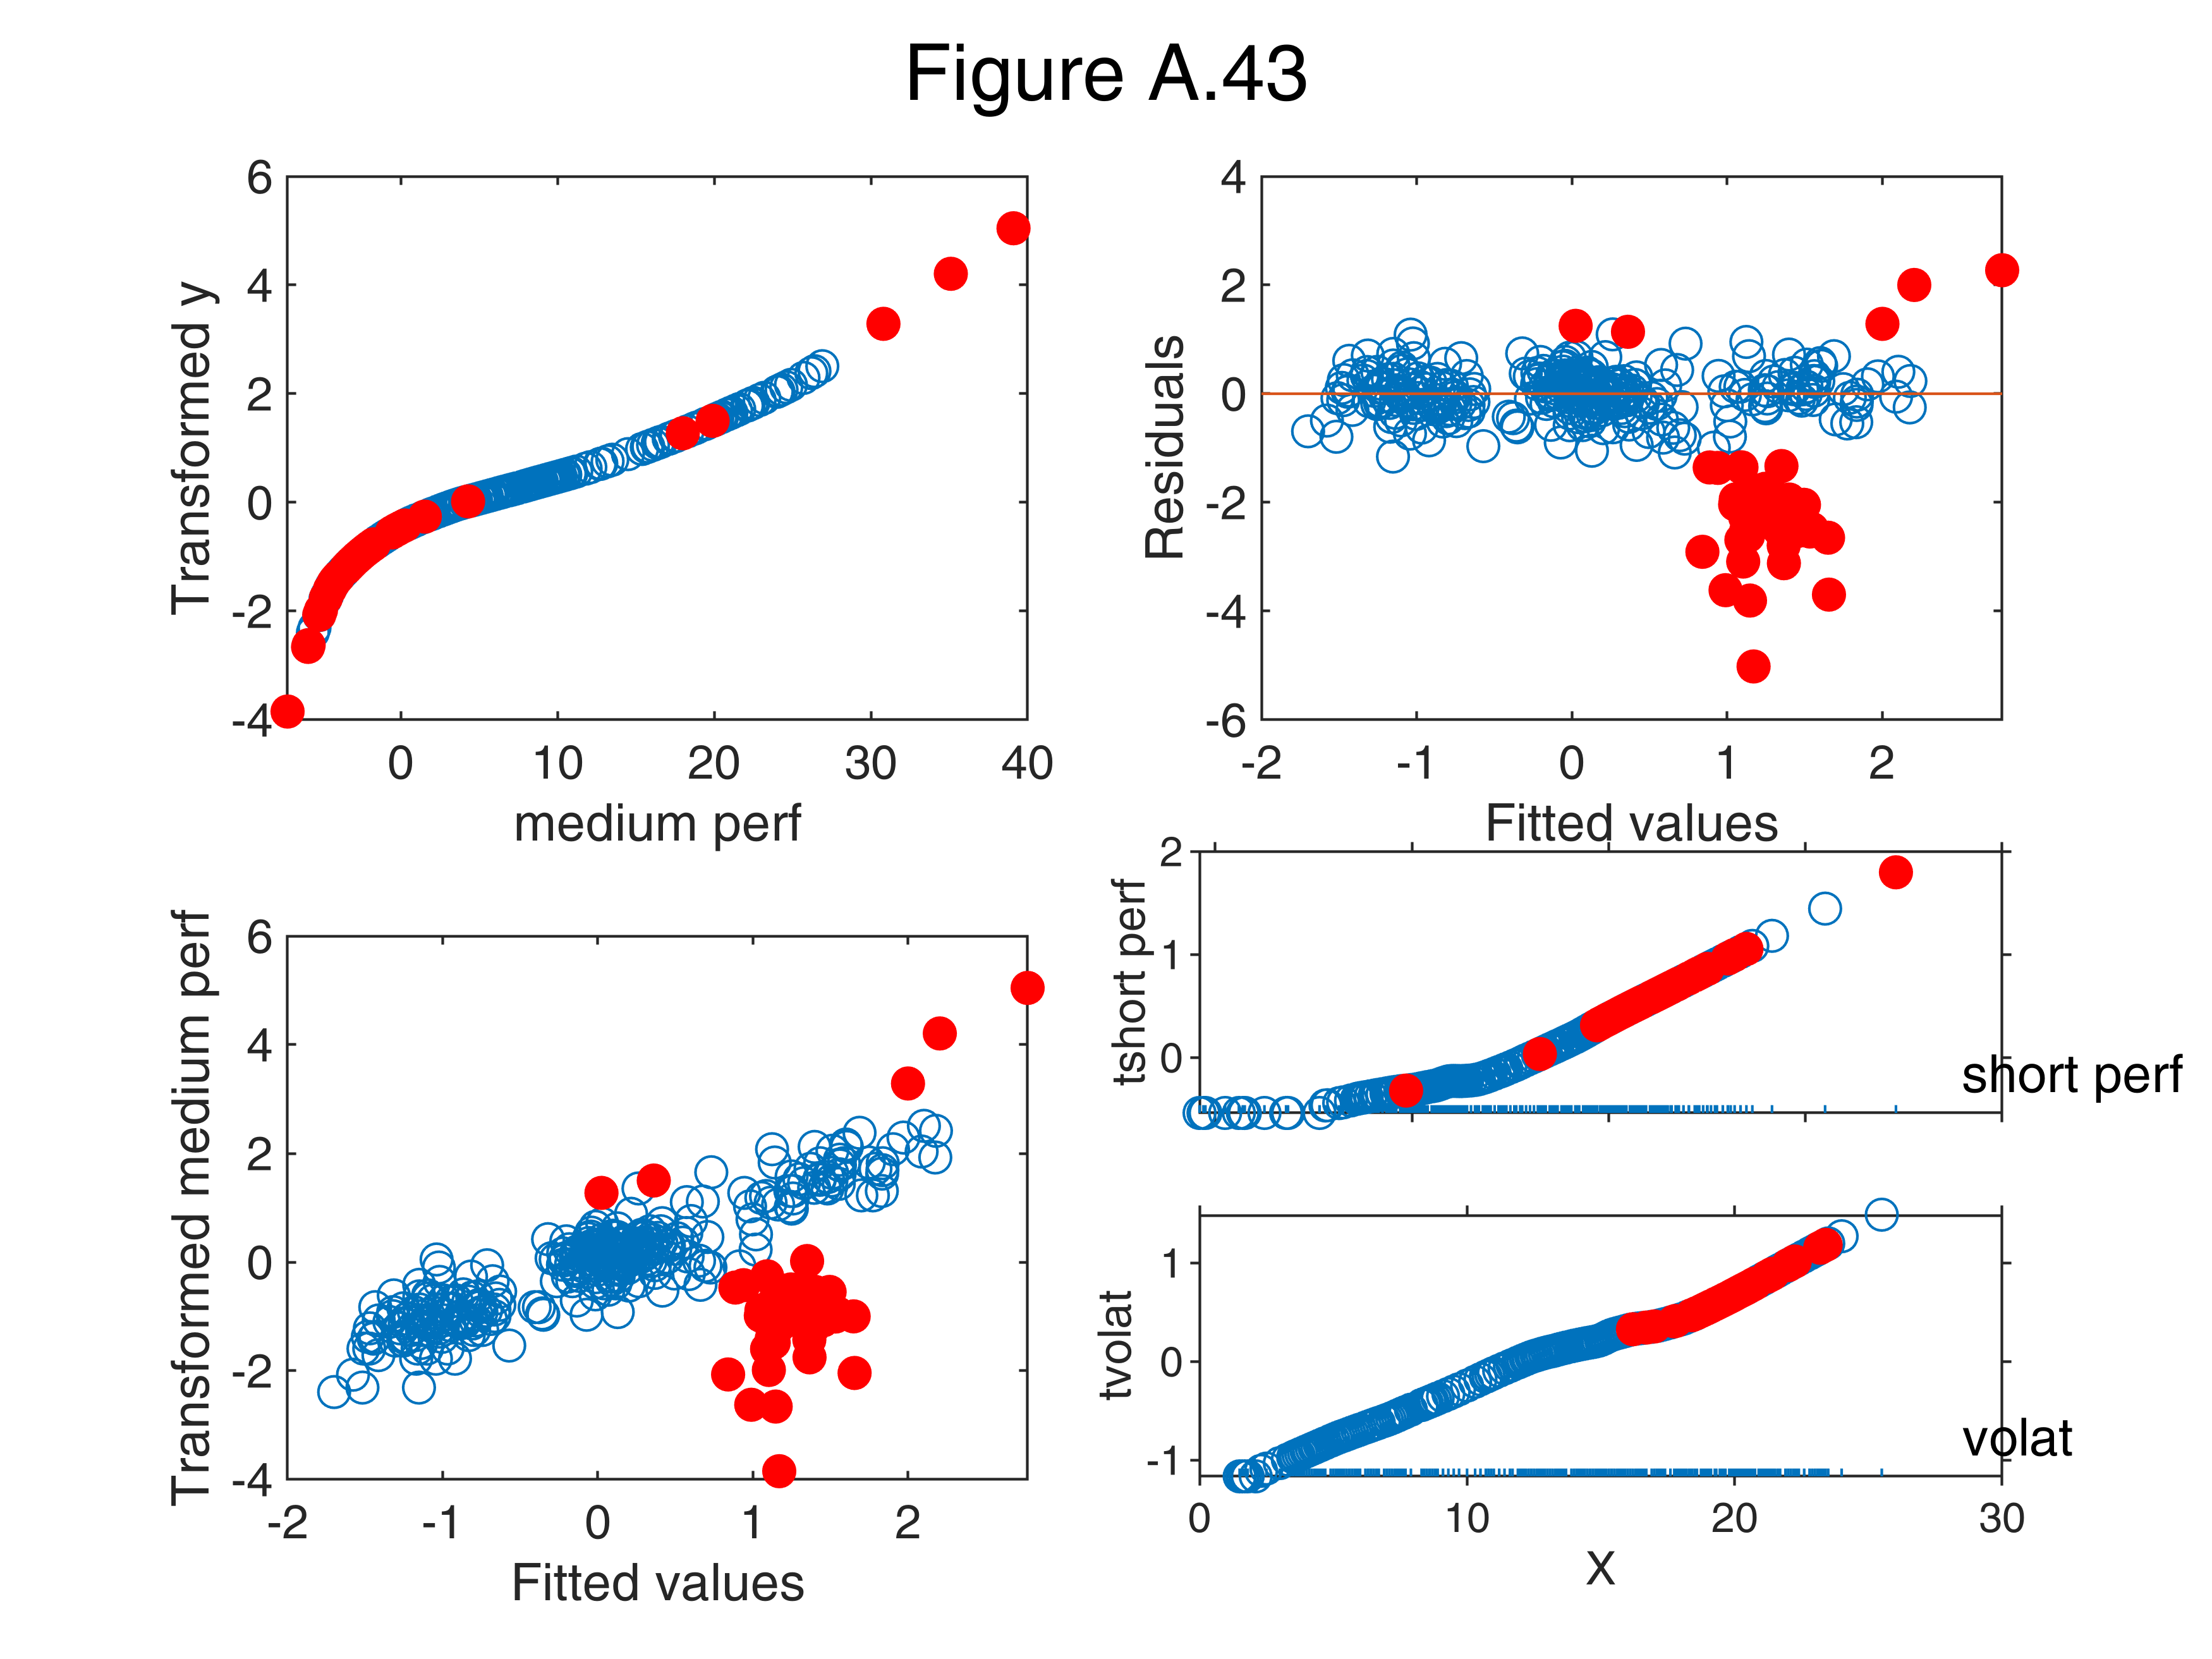

In [25]:
% Extract best solution
j=1;
outj=outAVAS{j,"Out"};
outrobAV=outj{:};

nameXy=replace(nameXy,"_", " ");
aceplot(outrobAV,'VarNames',nameXy,'notitle',true,'oneplot',true)
sgtitle('Figure A.43')
set(gcf,"Name",'Figure A.43')

In [26]:

if prin==1
    % print to postscript
    print -depsc figs\NP4.eps;
end

## Create Table A.19

In [27]:
disp('Table A.19: ANOVA in the transformed RAVAS scale')

Table A.19: ANOVA in the transformed RAVAS scale

In [28]:
outF=fitlm(outrobAV.tX,outrobAV.ty,'Exclude',outrobAV.outliers,'VarNames',nameXy);
disp(outF)

Linear regression model:
    medium perf ~ 1 + short perf + volat
Estimated Coefficients:
                    Estimate         SE          tStat         pValue  
                   ___________    ________    ___________    __________
    (Intercept)    -4.8704e-16    0.022248    -2.1892e-14             1
    short perf         0.98845    0.067077         14.736    2.3742e-37
    volat               1.0306    0.043482         23.701    1.0403e-70
Number of observations: 303, Error degrees of freedom: 300
Root Mean Squared Error: 0.387
R-squared: 0.852,  Adjusted R-Squared: 0.851
F-statistic vs. constant model: 860, p-value = 5.67e-125

In [29]:

%InsideREADME